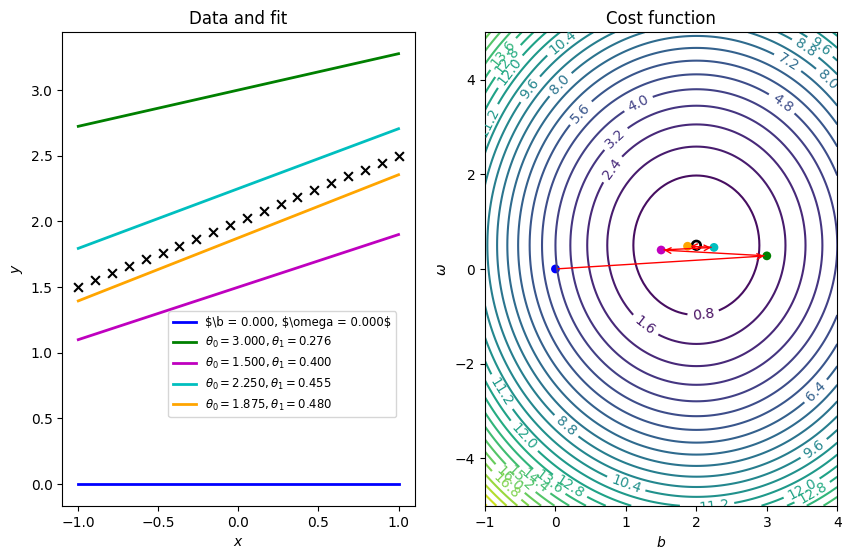

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# The data to fit
m = 20
bias_true = 2
weight_true = 0.5
x = np.linspace(-1,1,m)
y = weight_true * x + bias_true

def obj_fun(bias, weight):
    return weight * x + bias

def mse(bias, weight):
    if np.isscalar(weight):
        return np.mean((y - obj_fun(bias, weight))**2)
    else:
        # temp_w = weight[:, np.newaxis] 製作一個50x1的矩陣 (newaxis好神奇)
        return np.average((y - obj_fun(bias[np.newaxis,:,np.newaxis], weight[:,np.newaxis,np.newaxis]))**2, axis=2)
    
'''y = 0.5x+2 的圖'''
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6.15))
ax[0].scatter(x, y, marker='x', s=40, color='k')
'''y = 0.5x+2 的圖'''

'''準備gradient descent的底圖'''
bias_grid = np.linspace(-1,4,101)
weight_grid = np.linspace(-5,5,101) #注意這邊有101個點
possible_error = mse(bias=bias_grid, weight=weight_grid)
X, Y = np.meshgrid(bias_grid, weight_grid)
contours = ax[1].contour(X, Y, possible_error, 30)
ax[1].clabel(contours)
# The target parameter values indicated on the cost function contour plot
ax[1].scatter([bias_true]*2,[weight_true]*2,s=[50,10], color=['k','w'])
ax[1].set_ylabel(r'$\omega$')
ax[1].set_xlabel(r'$b$')
ax[1].set_title('Cost function')
'''準備gradient descent的底圖'''

'''用gradient descent跑每一個weight'''
N = 5
lr = 1.5
coeffs =[np.array((0, 0))] #配合 mse(bias, weight)，bias放前面[0]，weight放後面[1]
all_mse = [mse(*coeffs[0])] # 用*很方便
for j in range(1, N):
    last_coeffs = coeffs[-1]
    this_coeffs = np.empty((2,))
    this_coeffs[0] = last_coeffs[0] - lr * np.mean(obj_fun(*last_coeffs) - y)
    this_coeffs[1] = last_coeffs[1] - lr * np.mean((obj_fun(*last_coeffs) - y) * x)
    coeffs.append(this_coeffs)
    all_mse.append(mse(*this_coeffs))

# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
colors = ['b', 'g', 'm', 'c', 'orange']
ax[0].plot(x, obj_fun(*coeffs[0]), color=colors[0], lw=2,
           label=r'$\b = {:.3f}, $\omega = {:.3f}$'.format(*coeffs[0]))
for j in range(1,N):
    ax[1].annotate('', xy=coeffs[j], xytext=coeffs[j-1],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    ax[0].plot(x, obj_fun(*coeffs[j]), color=colors[j], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*coeffs[j]))
ax[1].scatter(*zip(*coeffs), c=colors, s=40, lw=0)
# 上面寫法 *coeffs的星號把tuple解開，透過zip對齊，coeffs第一個值都變成x值，第二個值都是y值，再透過*zip解成開兩個tuple

# Labels, titles and a legend.
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Data and fit')
axbox = ax[0].get_position()
# Position the legend by hand so that it doesn't cover up any of the lines.
ax[0].legend(loc=(axbox.x0+0.5*axbox.width, axbox.y0+0.1*axbox.height),
             fontsize='small')

plt.show()